In [4]:
import os
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from npy_append_array import NpyAppendArray

In [2]:
import shapely as sp

In [3]:
bus_sequences = pd.read_csv('data/london/bus-sequences.csv')

# Process bus stop data

In [4]:
bus_sequences = bus_sequences[bus_sequences.Virtual_Bus_Stop == 0]

In [5]:
bus_sequences = bus_sequences[bus_sequences.Route != 'UL29']

In [6]:
bus_sequences.Stop_Code_LBSL.unique().shape

(18919,)

In [7]:
bus_stops = bus_sequences.drop_duplicates('Stop_Code_LBSL')
bus_stops

,Route,Run,Sequence,Stop_Code_LBSL,Bus_Stop_Code,Naptan_Atco,Stop_Name,Location_Easting,Location_Northing,Heading,Virtual_Bus_Stop
0,1,1,1,14456,53369,490000235Z,NEW OXFORD STREET,529998,181428,74.0,0
1,1,1,2,29844,54468,490010131WB,MUSEUM STREET,530237,181523,53.0,0
2,1,1,3,26425,54321,490000112M,KINGSWAY / HOLBORN STATION <>,530560,181433,155.0,0
3,1,1,4,BP6517,92618,490019703Z,ALDWYCH / DRURY LANE,530637,180940,201.0,0
4,1,1,5,1835,71368,490014271N,WATERLOO BRIDGE / SOUTH BANK,530890,180366,149.0,0
...,...,...,...,...,...,...,...,...,...,...,...
57950,W9,1,18,R0321,71868,490008171E,HIGHLANDS VILLAGE / ELIZABETH LODGE,530370,195759,357.0,0
57951,W9,1,19,BP4303,51081,490016699W,TRESILIAN AVENUE,530535,195836,119.0,0
57970,W9,2,14,BP3212,54436,490001120E1,GRANGE PARK STATION #,531717,195453,102.0,0
57975,W9,2,19,70359,50330,490015417W,CHASE SIDE AVENUE,532605,197252,307.0,0


In [8]:
bus_stops = gpd.GeoDataFrame(bus_stops)

In [9]:
bus_stops['geometry'] = bus_stops.apply(lambda r: sp.geometry.Point(r.Location_Easting, r.Location_Northing), axis=1)

In [10]:
bus_stops = bus_stops.set_crs(epsg=27700) # BNG

In [11]:
bus_stops = bus_stops.to_crs(epsg=3857)

<AxesSubplot:>

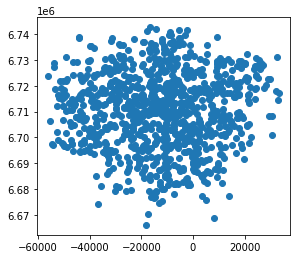

In [12]:
bus_stops.sample(1000).plot()

# Load pop data

In [13]:
if not os.path.exists('data/london/pop/pop_points.shp'):
    pop = gpd.read_file('data/london/pop/pop_cropped.shp')
    pop = pop.to_crs(epsg=3857)
    # turn singular multipoint into point
    pop['geometry'] = pop.geometry.apply(lambda x: x[0])
    pop.to_file('data/london/pop/pop_points.shp')
else:
    pop = gpd.read_file('data/london/pop/pop_points.shp')
pop

,Lat,Lon,Population,geometry
0,51.637917,-0.042361,7.564368,POINT (-4715.617 6734919.072)
1,51.639028,-0.042361,7.564368,POINT (-4715.617 6735118.370)
2,51.585139,-0.032361,14.139916,POINT (-3602.422 6725458.058)
3,51.638750,-0.055139,4.650666,POINT (-6138.033 6735068.545)
4,51.624028,-0.055694,7.764602,POINT (-6199.877 6732428.265)
...,...,...,...,...
1044713,51.490139,-0.207917,43.815364,POINT (-23145.177 6708455.888)
1044714,51.599028,0.230139,3.665215,POINT (25618.944 6727946.732)
1044715,51.597361,0.230694,3.665215,POINT (25680.788 6727648.051)
1044716,51.599028,0.231250,3.665215,POINT (25742.632 6727946.732)


In [14]:
pop = gpd.read_file('data/london/pop/pop_points.shp')
pop

,Lat,Lon,Population,geometry
0,51.637917,-0.042361,7.564368,POINT (-4715.617 6734919.072)
1,51.639028,-0.042361,7.564368,POINT (-4715.617 6735118.370)
2,51.585139,-0.032361,14.139916,POINT (-3602.422 6725458.058)
3,51.638750,-0.055139,4.650666,POINT (-6138.033 6735068.545)
4,51.624028,-0.055694,7.764602,POINT (-6199.877 6732428.265)
...,...,...,...,...
1044713,51.490139,-0.207917,43.815364,POINT (-23145.177 6708455.888)
1044714,51.599028,0.230139,3.665215,POINT (25618.944 6727946.732)
1044715,51.597361,0.230694,3.665215,POINT (25680.788 6727648.051)
1044716,51.599028,0.231250,3.665215,POINT (25742.632 6727946.732)


In [15]:
pop.crs # 3857

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
pop.Population.sum()

9079712.423511507

<AxesSubplot:>

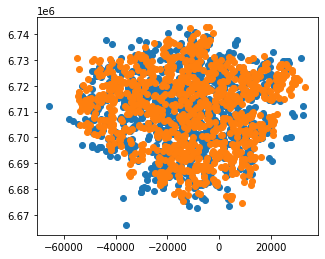

In [17]:
_, ax = plt.subplots()
bus_stops.sample(1000).plot(ax=ax)
pop.sample(1000).plot(ax=ax)

In [18]:
pop.sort_values('Population', ascending=False)

,Lat,Lon,Population,geometry
50121,51.485417,-0.081806,608.135437,POINT (-9106.553 6707611.675)
1039801,51.521250,-0.170972,532.011520,POINT (-19032.541 6714019.943)
1016314,51.557917,-0.285139,505.628005,POINT (-31741.516 6720582.462)
245293,51.509583,-0.007917,458.554816,POINT (-881.279 6711932.977)
690005,51.516806,-0.189028,457.014302,POINT (-21042.476 6713224.845)
...,...,...,...,...
690924,51.465972,-0.440694,0.163915,POINT (-49057.881 6704136.428)
690925,51.473472,-0.442917,0.163915,POINT (-49305.258 6705476.705)
690926,51.471528,-0.480972,0.163915,POINT (-53541.583 6705129.205)
690927,51.469028,-0.456250,0.163915,POINT (-50789.518 6704682.440)


## Inspecting correctedness

In [19]:
dists = bus_stops.distance(pop.geometry.iloc[50121])

In [20]:
dists.min()

394.528240682855

In [21]:
dists[dists == dists.min()]

3651    394.528241
dtype: float64

In [22]:
bus_stops.loc[3651]

Route                                                         136
Run                                                             2
Sequence                                                        7
Stop_Code_LBSL                                              36970
Bus_Stop_Code                                               51030
Naptan_Atco                                            490003274S
Stop_Name                                             ALSACE ROAD
Location_Easting                                           533105
Location_Northing                                          178186
Heading                                                     141.0
Virtual_Bus_Stop                                                0
geometry             POINT (-9387.273325697286 6707888.890972181)
Name: 3651, dtype: object

## testing analysis

In [23]:
# too expensive, need a smarter method
# matrix = pop.sample(100).geometry.apply(lambda g: bus_stops.sample(100).distance(g))
# matrix

In [24]:
bounds = pop.iloc[50121].geometry.buffer(500).bounds
bounds

(-9606.552788512581, 6707111.675329226, -8606.552788512581, 6708111.675329226)

In [25]:
within = bus_stops.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]]

In [26]:
within.Stop_Code_LBSL.drop_duplicates().count()

4

<AxesSubplot:>

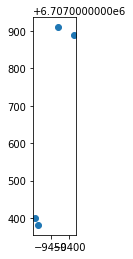

In [27]:
within.plot()

# number of stops within X distance for every population dot

In [28]:
# slightly speed it up
pop_tmp = pop[['geometry']].sample(23247)
pop_tmp

,geometry
785274,POINT (-40461.543 6725258.997)
667551,POINT (-13837.631 6721676.729)
27515,POINT (-51748.102 6710889.694)
167649,POINT (-11425.709 6700315.367)
690689,POINT (-46615.037 6702448.985)
...,...
146899,POINT (-21135.242 6687327.221)
517877,POINT (-40430.621 6699323.176)
538793,POINT (-9075.631 6716952.537)
468088,POINT (-17362.748 6694711.073)


In [29]:
bus_stops_tmp = bus_stops[['geometry']]
bus_stops_tmp

,geometry
0,POINT (-14232.946 6713228.184)
1,POINT (-13845.825 6713371.069)
2,POINT (-13331.621 6713213.058)
3,POINT (-13228.479 6712417.372)
4,POINT (-12846.554 6711484.294)
...,...
57950,POINT (-13044.735 6736283.684)
57951,POINT (-12776.229 6736400.957)
57970,POINT (-10891.664 6735734.140)
57975,POINT (-9388.071 6738597.192)


In [30]:
df = pop_tmp[0:2]
sub = df.geometry.apply(lambda g: bus_stops_tmp.distance(g))
sub

,0,1,2,3,4,5,6,7,8,9,...,57938,57943,57947,57948,57949,57950,57951,57970,57975,58035
785274,28856.191039,29149.944616,29683.95642,30108.920586,30859.844781,31549.542209,31985.649449,32410.960280,33154.095580,33500.754340,...,33795.165378,31364.118192,30217.291406,29958.212391,29730.225443,29550.381554,29843.254808,31370.468895,33815.205431,46904.571647
667551,8457.789238,8305.664941,8478.78397,9279.373132,10240.506240,10922.276254,11351.149807,11780.385265,12420.830164,12665.826476,...,17536.969280,14345.333134,14592.333489,14458.090522,14530.965948,14628.458747,14762.434082,14362.782127,17495.732462,33145.377755


In [31]:
sub.to_numpy()

array([[28856.19103862, 29149.94461551, 29683.95641986, ...,
        31370.46889499, 33815.2054311 , 46904.57164734],
       [ 8457.78923787,  8305.66494149,  8478.78397006, ...,
        14362.78212725, 17495.73246174, 33145.3777552 ]])

# Warning: slow

In [34]:
if not os.path.exists('gen/l_matrix.npy'):
    chunksize = 1000
    with NpyAppendArray('gen/l_matrix.npy') as npya:
        for i in range(0, pop_tmp.shape[0], chunksize):
            df = pop_tmp[i:i+chunksize]
            sub_matrix = df.geometry.apply(lambda g: bus_stops_tmp.distance(g))
            npya.append(np.ascontiguousarray(sub_matrix.to_numpy()))

In [6]:
matrix = np.load('gen/l_matrix.npy', mmap_mode='r')

In [36]:
matrix

memmap([[35476.63270598, 35840.74191534, 36371.51890718, ...,
         42304.96965702, 44906.39257548, 48280.94711979],
        [14861.56294101, 14466.91392631, 14161.79818131, ...,
         16017.72564816, 17861.45393598, 34665.43919466],
        [27561.59458808, 27471.19097469, 27063.92658617, ...,
         47038.57350019, 49480.48299989, 12163.48819089],
        ...,
        [12645.12022094, 12684.11745881, 13061.50512923, ...,
         14002.5139047 , 17193.41189903, 37031.00232594],
        [24780.1509971 , 25134.9974803 , 25343.21754509, ...,
         45877.11976285, 49105.60614353, 19345.45393428],
        [20208.79855079, 20087.34453654, 19655.27605361, ...,
         39502.92935429, 41997.18471426, 12730.97953986]])

In [37]:
matrix.shape

(23247, 18919)

In [38]:
pop_idxs = pop_tmp.index
pop_idxs

Int64Index([785274, 667551,  27515, 167649, 690689, 382575, 608925, 960770,
            237523, 578440,
            ...
            771766, 216068, 495907, 630464, 915200, 146899, 517877, 538793,
            468088, 295443],
           dtype='int64', length=23247)

In [39]:
count_for_every_pop = np.count_nonzero(matrix <= 500, axis=1)
count_for_every_pop

array([4, 5, 4, ..., 0, 3, 6])

In [40]:
count_for_every_pop.shape

(23247,)

In [41]:
df = pd.DataFrame([count_for_every_pop, pop_idxs], index=['counts', 'pop_idx'])

In [42]:
df = df.T
df

,counts,pop_idx
0,4,785274
1,5,667551
2,4,27515
3,4,167649
4,3,690689
...,...,...
23242,6,146899
23243,8,517877
23244,0,538793
23245,3,468088


In [43]:
pop_tmp_2 = pop.iloc[pop_tmp.index]
pop_tmp_2

,Lat,Lon,Population,geometry
785274,51.584028,-0.363472,8.504437,POINT (-40461.543 6725258.997)
667551,51.564028,-0.124306,20.988730,POINT (-13837.631 6721676.729)
27515,51.503750,-0.464861,7.002389,POINT (-51748.102 6710889.694)
167649,51.444583,-0.102639,6.471003,POINT (-11425.709 6700315.367)
690689,51.456528,-0.418750,7.777778,POINT (-46615.037 6702448.985)
...,...,...,...,...
146899,51.371806,-0.189861,8.773323,POINT (-21135.242 6687327.221)
517877,51.439028,-0.363194,6.483567,POINT (-40430.621 6699323.176)
538793,51.537639,-0.081528,10.577734,POINT (-9075.631 6716952.537)
468088,51.413194,-0.155972,6.223222,POINT (-17362.748 6694711.073)


In [44]:
df['pop'] = df['pop_idx'].apply(lambda idx: pop_tmp_2.loc[idx].Population)

In [45]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

In [46]:
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

Text(0, 0.5, 'number of bus stops within 500 m')

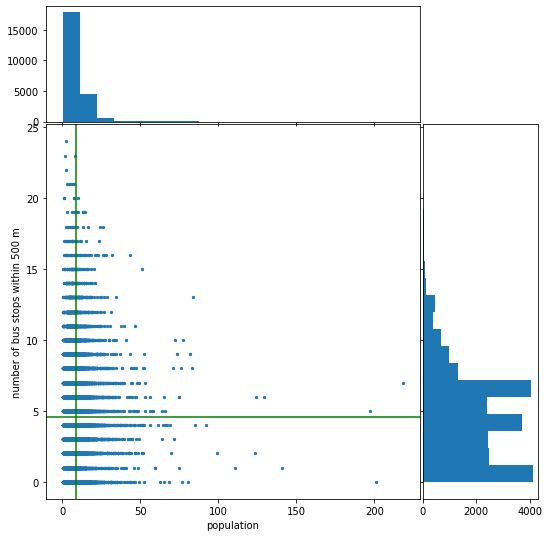

In [47]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df['pop'], df['counts'], s=5)
ax.axvline(x=df['pop'].mean(), c='green')
ax.axhline(y=df['counts'].mean(), c='green')

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df['pop'], bins=20)
ax_hy.hist(df['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 500 m')

In [48]:
df['counts'].describe()

count    23247.000000
mean         4.548544
std          3.267314
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         24.000000
Name: counts, dtype: float64

In [49]:
df_outliers = df[
    (df['pop'] >= df['pop'].mean() + df['pop'].std() * 3)
    | (df['counts'] >= df['counts'].mean() + df['counts'].std() * 3)
]
df_outliers

,counts,pop_idx,pop
11,16,76949,5.429632
185,2,902153,69.606794
209,4,924995,34.581855
337,18,250466,6.038225
390,3,407968,44.389234
...,...,...,...
23100,4,593958,32.124971
23101,15,634500,1.346351
23151,16,119362,9.509707
23178,5,663637,30.158593


In [50]:
df_gray = df[~df.index.isin(df_outliers.index)]

Text(0, 0.5, 'number of bus stops within 500 m')

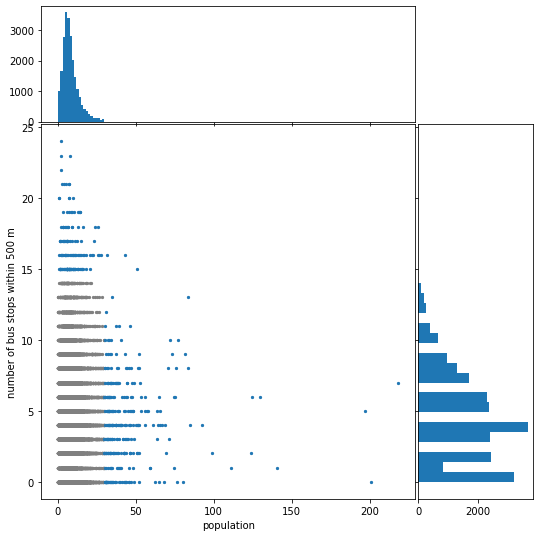

In [51]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df_gray['pop'], df_gray['counts'], s=5, c='gray')
ax.scatter(df_outliers['pop'], df_outliers['counts'], s=5)

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df_gray['pop'], bins=20)
ax_hy.hist(df_gray['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 500 m')

In [52]:
df['geometry'] = df['pop_idx'].apply(lambda idx: pop.loc[idx].geometry)

In [53]:
gdf = gpd.GeoDataFrame(df)

In [54]:
gdf[['counts', 'pop', 'geometry']].to_file('gen/l_nstops_500m.shp')

<AxesSubplot:>

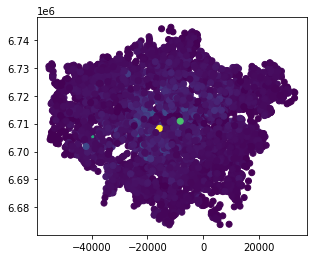

In [55]:
gdf.sample(5000).plot('pop')

<AxesSubplot:>

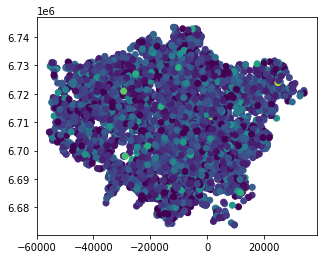

In [56]:
gdf.sample(5000).plot('counts')

In [57]:
gdf_outliers = gdf[
    (gdf['pop'] >= gdf['pop'].mean() + gdf['pop'].std() * 3)
    | (gdf['counts'] >= gdf['counts'].mean() + gdf['counts'].std() * 3)
]


<AxesSubplot:>

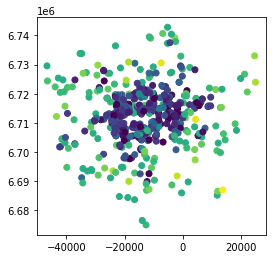

In [58]:
gdf_outliers.plot('counts')

# % of people living within X distance of bus stop

In [59]:
no_stops = gdf[gdf.counts == 0]
no_stops

,counts,pop_idx,pop,geometry
7,0,960770,4.960362,POINT (20640.489 6725607.357)
10,0,930931,7.212162,POINT (-30040.801 6719438.612)
34,0,54208,17.637440,POINT (-18754.242 6696892.818)
42,0,285939,18.767043,POINT (1685.253 6718394.368)
65,0,1002068,3.603604,POINT (-47635.465 6702498.611)
...,...,...,...,...
23212,0,803218,9.932667,POINT (-18537.787 6714516.919)
23213,0,458556,26.326717,POINT (-21444.463 6719786.724)
23217,0,573364,6.830503,POINT (-32329.035 6725458.058)
23220,0,161749,6.638840,POINT (12786.280 6703689.718)


<AxesSubplot:>

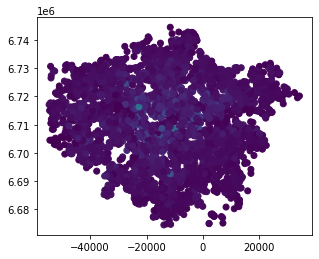

In [60]:
no_stops.plot('pop')

In [61]:
no_stops['pop'].sum()

28442.764065620046

In [62]:
# this is total pop of the random sample
gdf['pop'].sum()

201191.82608836226

In [63]:
# % of pop not within 500 m of bus stop
no_stops['pop'].sum() / gdf['pop'].sum()

0.14137136989416335

In [64]:
# % of pop within 500 m of bus stop
1 - no_stops['pop'].sum() / gdf['pop'].sum()

0.8586286301058367

# 1km

In [113]:
count_for_every_pop = np.count_nonzero(matrix <= 1000, axis=1)
count_for_every_pop

array([11, 18, 23, ...,  5,  8, 19])

In [114]:
count_for_every_pop.shape

(23247,)

In [115]:
df = pd.DataFrame([count_for_every_pop, pop_idxs], index=['counts', 'pop_idx'])

In [116]:
df = df.T
df

,counts,pop_idx
0,11,785274
1,18,667551
2,23,27515
3,21,167649
4,21,690689
...,...,...
23242,13,146899
23243,24,517877
23244,5,538793
23245,8,468088


In [117]:
pop_tmp_2 = pop.iloc[pop_tmp.index]
pop_tmp_2

,Lat,Lon,Population,geometry
785274,51.584028,-0.363472,8.504437,POINT (-40461.543 6725258.997)
667551,51.564028,-0.124306,20.988730,POINT (-13837.631 6721676.729)
27515,51.503750,-0.464861,7.002389,POINT (-51748.102 6710889.694)
167649,51.444583,-0.102639,6.471003,POINT (-11425.709 6700315.367)
690689,51.456528,-0.418750,7.777778,POINT (-46615.037 6702448.985)
...,...,...,...,...
146899,51.371806,-0.189861,8.773323,POINT (-21135.242 6687327.221)
517877,51.439028,-0.363194,6.483567,POINT (-40430.621 6699323.176)
538793,51.537639,-0.081528,10.577734,POINT (-9075.631 6716952.537)
468088,51.413194,-0.155972,6.223222,POINT (-17362.748 6694711.073)


In [118]:
df['pop'] = df['pop_idx'].apply(lambda idx: pop_tmp_2.loc[idx].Population)

In [119]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

In [120]:
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

Text(0, 0.5, 'number of bus stops within 1000 m')

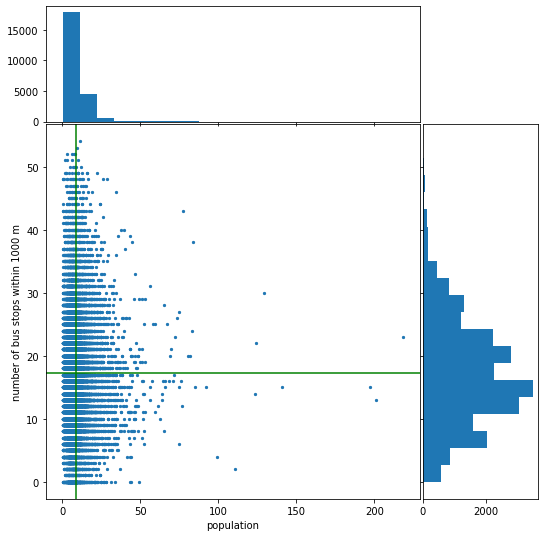

In [121]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df['pop'], df['counts'], s=5)
ax.axvline(x=df['pop'].mean(), c='green')
ax.axhline(y=df['counts'].mean(), c='green')

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df['pop'], bins=20)
ax_hy.hist(df['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 1000 m')

In [122]:
df['counts'].describe()

count    23247.000000
mean        17.183637
std          8.393492
min          0.000000
25%         11.000000
50%         16.000000
75%         22.000000
max         54.000000
Name: counts, dtype: float64

In [123]:
df[['counts', 'pop']].to_csv('gen/l_nstops_1000m.csv')

In [124]:
df_outliers = df[
    (df['pop'] >= df['pop'].mean() + df['pop'].std() * 3)
    | (df['counts'] >= df['counts'].mean() + df['counts'].std() * 3)
]
df_outliers

,counts,pop_idx,pop
107,44,161511,12.535694
112,44,974556,9.551708
185,21,902153,69.606794
209,18,924995,34.581855
254,47,15741,13.393035
...,...,...,...
23100,30,593958,32.124971
23178,11,663637,30.158593
23179,9,1030076,29.955308
23186,44,414484,2.760013


In [125]:
df_gray = df[~df.index.isin(df_outliers.index)]

Text(0, 0.5, 'number of bus stops within 1000 m')

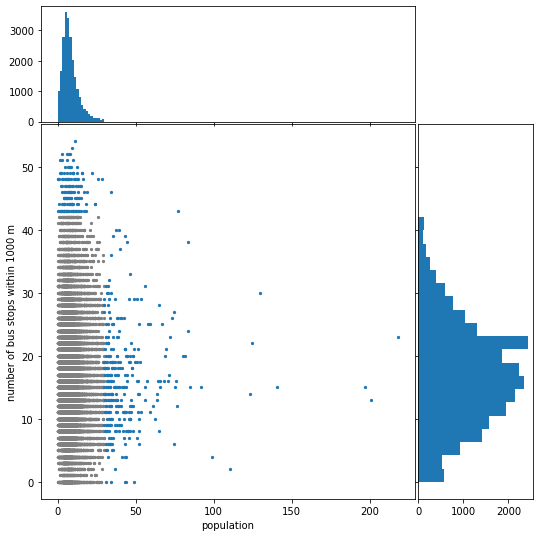

In [126]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df_gray['pop'], df_gray['counts'], s=5, c='gray')
ax.scatter(df_outliers['pop'], df_outliers['counts'], s=5)

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df_gray['pop'], bins=20)
ax_hy.hist(df_gray['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 1000 m')

In [127]:
df['geometry'] = df['pop_idx'].apply(lambda idx: pop.loc[idx].geometry)

In [128]:
gdf = gpd.GeoDataFrame(df)

In [129]:
gdf[['counts', 'pop', 'geometry']].to_file('gen/l_nstops_1000m.shp')

<AxesSubplot:>

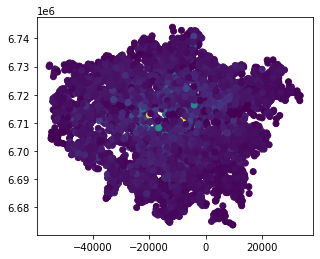

In [82]:
gdf.sample(5000).plot('pop')

<AxesSubplot:>

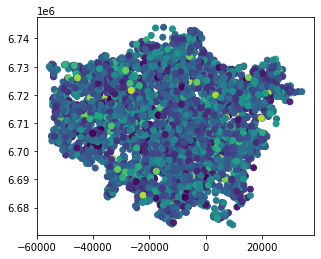

In [83]:
gdf.sample(5000).plot('counts')

In [84]:
gdf_outliers = gdf[
    (gdf['pop'] >= gdf['pop'].mean() + gdf['pop'].std() * 3)
    | (gdf['counts'] >= gdf['counts'].mean() + gdf['counts'].std() * 3)
]


<AxesSubplot:>

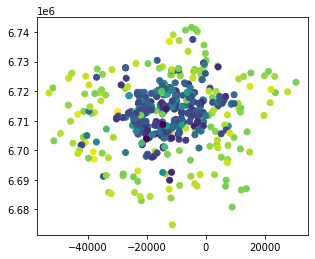

In [85]:
gdf_outliers.plot('counts')

# % of people living within X distance of bus stop

In [86]:
no_stops = gdf[gdf.counts == 0]
no_stops

,counts,pop_idx,pop,geometry
34,0,54208,17.637440,POINT (-18754.242 6696892.818)
42,0,285939,18.767043,POINT (1685.253 6718394.368)
152,0,824151,6.232188,POINT (7096.618 6703540.820)
189,0,838209,1.346081,POINT (-53943.570 6710492.289)
222,0,46417,3.869502,POINT (-14950.826 6692529.912)
...,...,...,...,...
22817,0,614908,13.660185,POINT (-6045.267 6701704.636)
22917,0,894959,6.178659,POINT (-15012.670 6721477.761)
22993,0,606772,44.027385,POINT (-14548.839 6708654.538)
23065,0,406797,9.881166,POINT (-33782.373 6718493.814)


<AxesSubplot:>

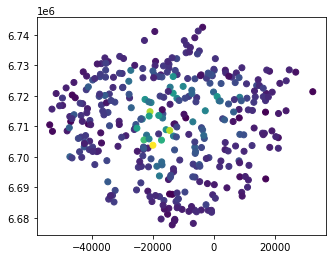

In [87]:
no_stops.plot('pop')

In [88]:
no_stops['pop'].sum()

3181.982569407012

In [89]:
# this is total pop of the random sample
gdf['pop'].sum()

201191.82608836226

In [90]:
# % of pop not within 500 m of bus stop
no_stops['pop'].sum() / gdf['pop'].sum()

0.01581566523487641

In [91]:
# % of pop within 500 m of bus stop
1 - no_stops['pop'].sum() / gdf['pop'].sum()

0.9841843347651236

# 100m

In [130]:
count_for_every_pop = np.count_nonzero(matrix <= 100, axis=1)
count_for_every_pop

array([0, 1, 0, ..., 0, 0, 0])

In [131]:
count_for_every_pop.shape

(23247,)

In [132]:
df = pd.DataFrame([count_for_every_pop, pop_idxs], index=['counts', 'pop_idx'])

In [133]:
df = df.T
df

,counts,pop_idx
0,0,785274
1,1,667551
2,0,27515
3,0,167649
4,0,690689
...,...,...
23242,0,146899
23243,0,517877
23244,0,538793
23245,0,468088


In [134]:
pop_tmp_2 = pop.iloc[pop_tmp.index]
pop_tmp_2

,Lat,Lon,Population,geometry
785274,51.584028,-0.363472,8.504437,POINT (-40461.543 6725258.997)
667551,51.564028,-0.124306,20.988730,POINT (-13837.631 6721676.729)
27515,51.503750,-0.464861,7.002389,POINT (-51748.102 6710889.694)
167649,51.444583,-0.102639,6.471003,POINT (-11425.709 6700315.367)
690689,51.456528,-0.418750,7.777778,POINT (-46615.037 6702448.985)
...,...,...,...,...
146899,51.371806,-0.189861,8.773323,POINT (-21135.242 6687327.221)
517877,51.439028,-0.363194,6.483567,POINT (-40430.621 6699323.176)
538793,51.537639,-0.081528,10.577734,POINT (-9075.631 6716952.537)
468088,51.413194,-0.155972,6.223222,POINT (-17362.748 6694711.073)


In [135]:
df['pop'] = df['pop_idx'].apply(lambda idx: pop_tmp_2.loc[idx].Population)

In [136]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

In [137]:
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

Text(0, 0.5, 'number of bus stops within 100 m')

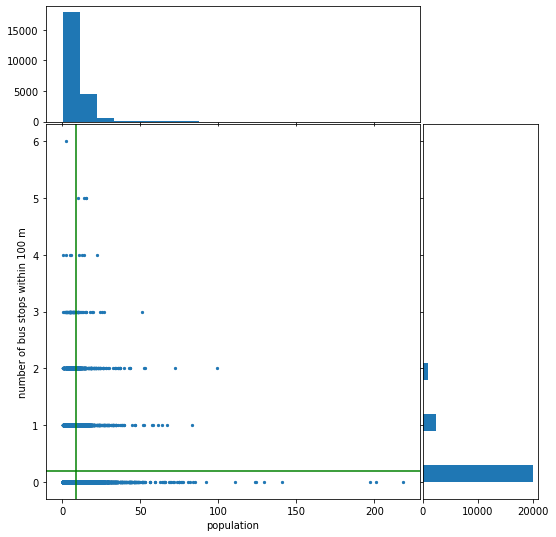

In [138]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df['pop'], df['counts'], s=5)
ax.axvline(x=df['pop'].mean(), c='green')
ax.axhline(y=df['counts'].mean(), c='green')

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df['pop'], bins=20)
ax_hy.hist(df['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 100 m')

In [139]:
df['counts'].describe()

count    23247.000000
mean         0.188282
std          0.504939
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: counts, dtype: float64

In [140]:
df[['counts', 'pop']].to_csv('gen/l_nstops_100m.csv')

In [141]:
df_outliers = df[
    (df['pop'] >= df['pop'].mean() + df['pop'].std() * 3)
    | (df['counts'] >= df['counts'].mean() + df['counts'].std() * 3)
]
df_outliers

,counts,pop_idx,pop
9,2,578440,4.065903
18,2,250633,8.446706
22,2,289639,5.237402
46,2,406150,5.648251
47,2,884507,11.239930
...,...,...,...
23178,0,663637,30.158593
23179,0,1030076,29.955308
23193,2,515093,0.652013
23228,2,592372,4.176457


In [142]:
df_gray = df[~df.index.isin(df_outliers.index)]

Text(0, 0.5, 'number of bus stops within 100 m')

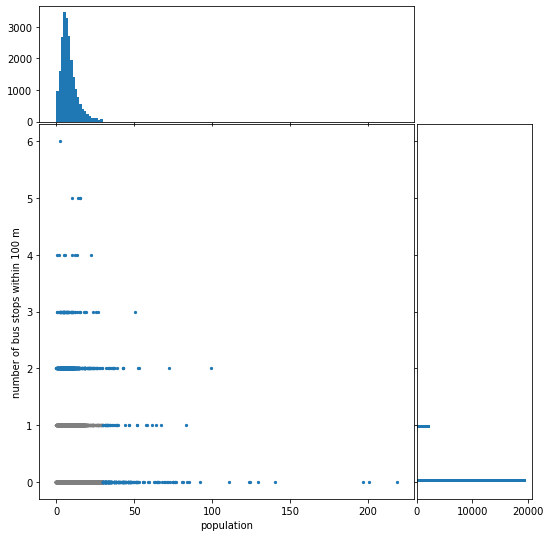

In [143]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df_gray['pop'], df_gray['counts'], s=5, c='gray')
ax.scatter(df_outliers['pop'], df_outliers['counts'], s=5)

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df_gray['pop'], bins=20)
ax_hy.hist(df_gray['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 100 m')

In [144]:
df['geometry'] = df['pop_idx'].apply(lambda idx: pop.loc[idx].geometry)

In [145]:
gdf = gpd.GeoDataFrame(df)

In [146]:
gdf[['counts', 'pop', 'geometry']].to_file('gen/l_nstops_100m.shp')

<AxesSubplot:>

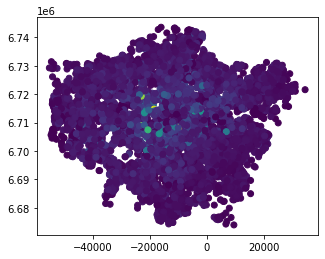

In [111]:
gdf.sample(5000).plot('pop')

<AxesSubplot:>

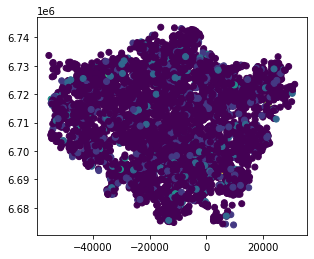

In [112]:
gdf.sample(5000).plot('counts')

In [113]:
gdf_outliers = gdf[
    (gdf['pop'] >= gdf['pop'].mean() + gdf['pop'].std() * 3)
    | (gdf['counts'] >= gdf['counts'].mean() + gdf['counts'].std() * 3)
]


<AxesSubplot:>

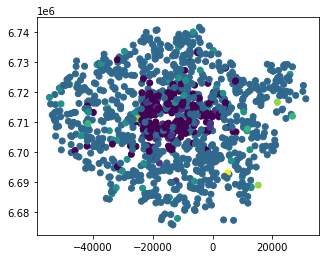

In [114]:
gdf_outliers.plot('counts')

# % of people living within X distance of bus stop

In [115]:
df[df['counts'] == 0]['pop'].sum()

174337.30521391687

In [116]:
df[df['counts'] != 0]['pop'].sum()

28759.604074349852

In [117]:
no_stops = gdf[gdf.counts == 0]
no_stops

,counts,pop_idx,pop,geometry
0,0,1042982,22.032834,POINT (-1159.578 6712429.825)
2,0,1006450,1.827449,POINT (21166.164 6701555.775)
3,0,868138,11.956809,POINT (-33658.685 6710492.289)
4,0,644170,3.129342,POINT (-29205.905 6697487.941)
5,0,708934,7.337984,POINT (-7745.981 6732428.265)
...,...,...,...,...
23242,0,89727,16.612153,POINT (-28618.386 6728444.559)
23243,0,736026,4.245340,POINT (-41358.283 6730535.761)
23244,0,813380,8.629481,POINT (-8426.267 6688169.336)
23245,0,730210,6.596573,POINT (1283.266 6704235.701)


<AxesSubplot:>

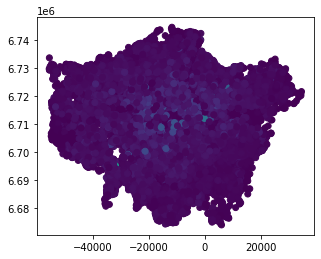

In [118]:
no_stops.plot('pop')

In [119]:
no_stops['pop'].sum()

174337.30521391687

In [120]:
# this is total pop of the random sample
gdf['pop'].sum()

203096.9092882667

In [121]:
# this is the global population
#pop.Population.sum()

In [122]:
# % of pop not within 100 m of bus stop
no_stops['pop'].sum() / gdf['pop'].sum()

0.8583946738769435

In [123]:
# % of pop within 100 m of bus stop
1 - no_stops['pop'].sum() / gdf['pop'].sum()

0.14160532612305654

# More continuous plots of % within

In [124]:
def pct_pop_within_stop(distance):
    count_for_every_pop = np.count_nonzero(matrix <= distance, axis=1)
    df = pd.DataFrame([count_for_every_pop, pop_idxs], index=['counts', 'pop_idx']).T
    df['pop'] = df['pop_idx'].apply(lambda idx: pop_tmp_2.loc[idx].Population)
    #df['geometry'] = df['pop_idx'].apply(lambda idx: pop.loc[idx].geometry)
    no_stops = df[df.counts == 0]
    return 1 - no_stops['pop'].sum() / df['pop'].sum()

In [125]:
pct_pop_within_stop(100)

0.14160532612305654

In [2]:
domain = list(range(100, 1100, 100))
domain

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [128]:
pcts = [pct_pop_within_stop(x) for x in domain]
pcts

[0.14160532612305654,
 0.40719912549492554,
 0.625695770742569,
 0.7702542255003852,
 0.8580232809427477,
 0.9141998495298195,
 0.947224025849007,
 0.9665935455462213,
 0.9784402253536]

<AxesSubplot:>

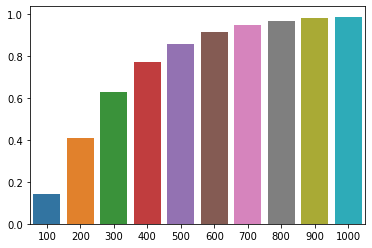

In [134]:
sns.barplot(y=pcts, x=domain)

In [139]:
pd.DataFrame(pcts, columns=['percentage'], index=domain).to_csv('gen/l_percentage_within.csv')

# Distributions of number of dots within stop

In [7]:
distrs = [np.count_nonzero(matrix <= distance, axis=1) for distance in domain]
distrs

[array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 2, 0, ..., 0, 2, 1]),
 array([1, 4, 0, ..., 0, 2, 2]),
 array([3, 4, 2, ..., 0, 2, 5]),
 array([4, 5, 4, ..., 0, 3, 6]),
 array([ 4,  6,  7, ...,  0,  3, 12]),
 array([ 5,  8, 10, ...,  0,  5, 14]),
 array([ 8,  9, 12, ...,  1,  5, 18]),
 array([10, 14, 15, ...,  5,  7, 19]),
 array([11, 18, 23, ...,  5,  8, 19])]

In [8]:
dists_df = pd.DataFrame(distrs).T

In [9]:
dists_df.columns = domain

In [10]:
dists_df

,100,200,300,400,500,600,700,800,900,1000
0,0,0,1,3,4,4,5,8,10,11
1,1,2,4,4,5,6,8,9,14,18
2,0,0,0,2,4,7,10,12,15,23
3,0,0,4,4,4,4,8,12,19,21
4,0,0,0,1,3,9,12,14,17,21
...,...,...,...,...,...,...,...,...,...,...
23242,0,0,1,6,6,8,8,10,12,13
23243,0,1,2,5,8,12,14,16,21,24
23244,0,0,0,0,0,0,0,1,5,5
23245,0,2,2,2,3,3,5,5,7,8


In [11]:
dists_df = dists_df.reset_index().melt('index', dists_df.columns, var_name='distance', value_name='count')
dists_df

,index,distance,count
0,0,100,0
1,1,100,1
2,2,100,0
3,3,100,0
4,4,100,0
...,...,...,...
232465,23242,1000,13
232466,23243,1000,24
232467,23244,1000,5
232468,23245,1000,8


<AxesSubplot:xlabel='distance', ylabel='count'>

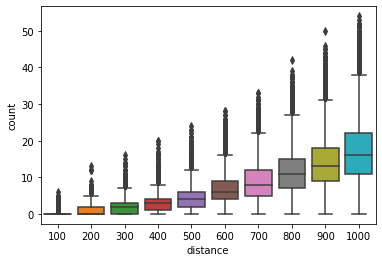

In [12]:
sns.boxplot(data=dists_df, x='distance', y='count')

In [13]:
dists_df[['distance', 'count']].to_csv('gen/l_dists_nstops.csv')